In [136]:
import pandas as pd
import seaborn as sns
train = pd.read_csv('train.csv')
train["Age"] = train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
train['cabin_missing'] = True
train.loc[pd.isna(train['Cabin']) == False, "cabin_missing"] = False
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


train.dropna(inplace=True) might cause troubles because 77.1% of data will be dropped. Moreover, cabin_missing variable is highly correlated with variables Pclass (0.72), Fare(0.48), Survived(0.31) and Age(0.27). Subsequently, the regression results will be highly biased, not being able to represent the real situation and having low predictive power. Moreover, this column actually contains information: in format like ‘C123’ first letter refers to the deck.

1. Engineer at least two more features to include in your model (Examples are: https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/). For each feature perform visualizations and interpret them.

In [137]:
train['relatives']=train['SibSp']+train['Parch']
train['alone']=(train['relatives']==0)
train["married_woman"] = "no"
train.loc[(train['Name'].str.contains("\(") == True), "married_woman"] = 'yes'
train['Deck']=train['Cabin'].str.split("(\w)", n=1, expand=True)[1]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_missing,relatives,alone,married_woman,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,1,False,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,1,False,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,0,True,no,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,1,False,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,0,True,no,NaN


<AxesSubplot:xlabel='relatives', ylabel='count'>

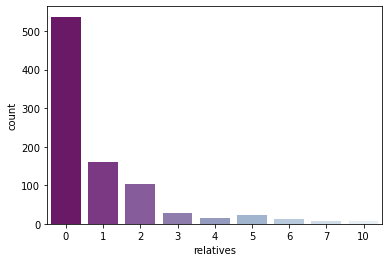

In [138]:
sns.countplot(x='relatives',  data=train, palette='BuPu_r')

<AxesSubplot:xlabel='alone', ylabel='count'>

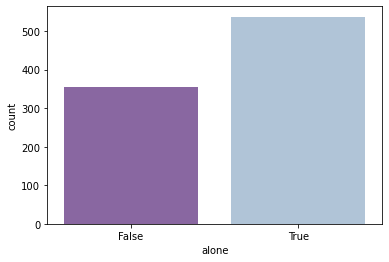

In [139]:
sns.countplot(x='alone',data=train, palette='BuPu_r')

<AxesSubplot:xlabel='married_woman', ylabel='count'>

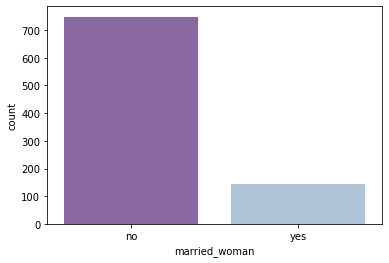

In [140]:
sns.countplot(x='married_woman',data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Deck', ylabel='count'>

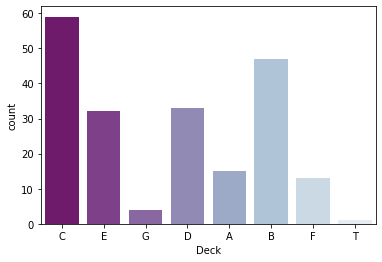

In [141]:
sns.countplot(x='Deck',data=train, palette='BuPu_r')

2. Can you think of possible interactions and polynomials potentially relevant for your model? If yes, do so.

In [142]:
train['Age_poly2'] = train['Age']**2
train['Age_poly3'] = train['Age']**3

In [143]:
train['Age*Pclass']=train['Age']*train['Pclass']
train['Fare_Per_Person']=train['Fare']/(train['relatives']+1)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_Per_Person'>

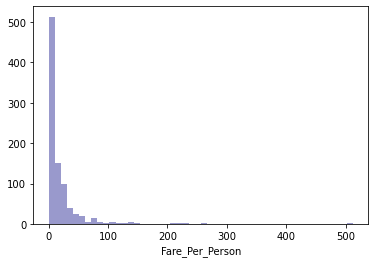

In [144]:
sns.distplot(train['Fare_Per_Person'], color='navy', bins=50, kde=False)

3. Include the new features --generated in 1 and  2 -- in your model. Does your model improve? What measures did you use to determine this? Interpret coefficients. Do the signs of the coefficients make sense? Why and why not? 

In [145]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)
marriedw = pd.get_dummies(train['married_woman'], drop_first=True)
alone_d = pd.get_dummies(train['alone'], drop_first=True)
deck = pd.get_dummies(train['Deck'], drop_first=True)

train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId', 'Pclass', 'Deck', 'Cabin','married_woman',"alone"], axis=1, inplace=True)
train = pd.concat([train, sex, embark, pclass,deck, marriedw,alone_d], axis=1)
train.head()

,Survived,Age,SibSp,Parch,Fare,cabin_missing,relatives,Age_poly2,Age_poly3,Age*Pclass,...,3,B,C,D,E,F,G,T,yes,True
0,0,22.0,1,0,7.2500,True,1,484.0,10648.0,66.0,...,1,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,False,1,1444.0,54872.0,38.0,...,0,0,1,0,0,0,0,0,1,0
2,1,26.0,0,0,7.9250,True,0,676.0,17576.0,78.0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,False,1,1225.0,42875.0,35.0,...,0,0,1,0,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,True,0,1225.0,42875.0,105.0,...,1,0,0,0,0,0,0,0,0,1


In [146]:
train.columns

Index([       'Survived',             'Age',           'SibSp',
                 'Parch',            'Fare',   'cabin_missing',
             'relatives',       'Age_poly2',       'Age_poly3',
            'Age*Pclass', 'Fare_Per_Person',            'male',
                     'Q',               'S',                 2,
                       3,               'B',               'C',
                     'D',               'E',               'F',
                     'G',               'T',             'yes',
                    True],
      dtype='object')

In [147]:
train = train.rename(columns={'Q':"Queenstown", 'S':"Southampton", 2: "second_class", 3: "third_class", 'yes': "married_woman", True: "alone"})

In [148]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_missing',
       'relatives', 'Age_poly2', 'Age_poly3', 'Age*Pclass', 'Fare_Per_Person',
       'male', 'Queenstown', 'Southampton', 'second_class', 'third_class', 'B',
       'C', 'D', 'E', 'F', 'G', 'T', 'married_woman', 'alone'],
      dtype='object')

Survived is a binary variable which is 1 if the passender survived, 0 if did not. <br>Age is a continuous variable, with minimum of 0.42 and maximum of 80 in train data. The distribution of this variable is peaked at around 27 years, and smoothly falling afterwards. There were more very small children than that of 10-12 year olds. <br> SibSp is a discrete variable, which represents the number of (siblings+spouse) onboard, it is zero if a passenger did not have spouse nor siblings onboard. <br> Parch is also discrete variable, which represents the number of (Parents+children) onboard, it is zero if a passenger did not have his/her parents nor children onboard. <br> Fare is a continuous variable, with minimum of 0 and maximum of 512.3292. It represents the price of the ticket sold to a traveling group, i.e. it is not the price per passenger but for the group. The distribution of this variable is skewed right with a lot of passengers paying zero price and smoothly falling afterwards. <br> cabin_missing is an indicator variable which takes value one in case cabin data is missing. <br> relatives is the number of relatives onboard, variable was generated by summing SibSp and Parch. <br>Age_poly2 and Age_poly3 are simply square and cube of Age variable. It was added as an interaction term. <br> Fare_Per_Person is simply Fare divided by number of relatives. <br> Male is a binary variable which is 1 if the passenger is male and 0 if the passenger is female. <br> Queenstown is a binary variable which is 1 if the traveller mounted from Queenstown and 0 if not.<br> Southampton is a binary variable which is 1 if the traveller mounted from Southampton and 0 if not. <br> If both Q and S are 0, then the passenger mounted from Cherbourg. <br> Variable second_class is also binary and it is 1 if the passenger has second class ticket and 0 if not. <br> Variable third_class is also binary and it is 1 if the passenger has third class ticket and 0 if not. <br> If both 2 and 3 are 0, then the passenger has first class ticket. <br> married_woman is a binary variable which is 1 if the traveller is a married woman and 0 if not. <br> alone is a binary variable which is 1 if the traveller did not have relatives onboard and 0 if he/she had at least one relative. <br> Other letters are the binary variables for the deck and it is 1 if the traveller has cabin in that deck and 0 is not.

In [149]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived',axis=1)
y = train['Survived']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


In [150]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
logreg.fit(X_train, y_train)
X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

In [151]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       137
           1       0.81      0.69      0.74        86

    accuracy                           0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223



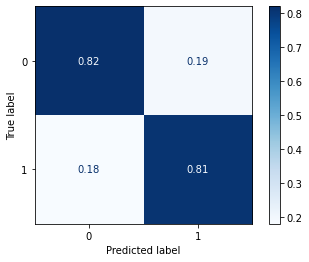

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

4. Check the balance of your classes. How many observations do you have in each class? Do you have a class imbalance? 

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

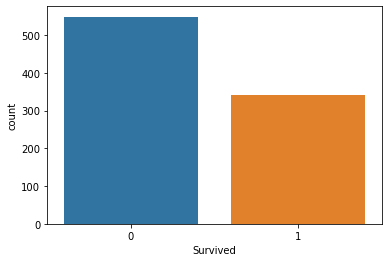

In [154]:
import seaborn as sns
sns.countplot(y)

The classes of the target show a some, albeit not extreme, imbalance.

5. What google/stack overflow search would you carry out to correct for class imbalance? (Yes, you should type the google search you did and copy-paste the link of the answer.) Correct potential class imbalance, if you think it’s important to do so. 

https://elitedatascience.com/imbalanced-classes

In [155]:
from sklearn.utils import resample

# Separate majority and minority classes
train_majority = train[train.Survived==0]
train_minority = train[train.Survived==1]
 
# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=549,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_majority, train_minority_upsampled])
 
# Display new class counts
train_upsampled.Survived.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [156]:
X = train_upsampled.drop('Survived',axis=1)
y = train_upsampled['Survived']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [157]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
logreg.fit(X_train, y_train)
X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

In [158]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       138
           1       0.82      0.77      0.79       137

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



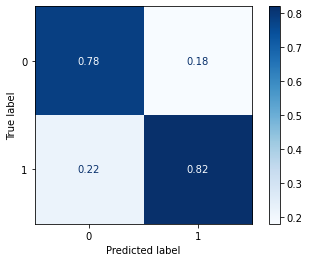

In [159]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

Implementing upsampling to correct for imbalance actually diminished the accuracy of the model.

6. Use Lasso and Ridge for regularization. Use cross-validation to select the tuning parameter.

7. Use your best model to generate predictions for test.csv. Identify features that are important for your best model. Which features are most influential, and which features could be removed without a decrease in performance? Does removing irrelevant features make your model better?